# ANALISIS DE CONSUMO DE NETFLIX CON PYTHON

## 1. IMPORTACION Y CARGA DE DATOS

In [ ]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

In [ ]:
df

,Title,Date
0,Cangrejo Negro,21/3/22
1,El rescate de Ruby,20/3/22
2,Piratas: El último tesoro de la corona,18/3/22
3,Riesgo bajo cero,18/3/22
4,El proyecto Adam,14/3/22
...,...,...
2512,Alquiler de padrinos,15/7/18
2513,Un novato en apuros 2,15/7/18
2514,Zapatero a tus zapatos,15/7/18
2515,Anatomía según Grey: Temporada 13: En el aire ...,15/7/18


## 2. ANALISIS EXPLORATORIO

In [ ]:
df.shape

(2517, 2)

In [ ]:
df.head(10)

,Title,Date
0,Cangrejo Negro,21/3/22
1,El rescate de Ruby,20/3/22
2,Piratas: El último tesoro de la corona,18/3/22
3,Riesgo bajo cero,18/3/22
4,El proyecto Adam,14/3/22
5,Winter on Fire: Ukraine's Fight for Freedom,1/3/22
6,Shrek 2,28/2/22
7,Shrek,28/2/22
8,Guerra Mundial Z,28/2/22
9,Réplicas,28/2/22


In [ ]:
df.sample(10)

,Title,Date
696,Una película de miedo,25/10/19
1076,Tres por tres: Temporada 5: El problema con Danny,12/9/19
2362,Sonic Boom: Temporada 1: Los clones de Eggman,7/8/18
2214,"José José, el príncipe de la canción: Season 1...",4/9/18
270,Sweet Girl,21/8/21
2295,Mente indomable,10/8/18
2086,Pokémon: Liga índigo: Temporada 1: Batalla en ...,24/12/18
2073,Los 3 de abajo: Relatos de Arcadia: Parte 1: T...,25/12/18
978,Tres por tres: Temporada 7: Una casa dividida,27/9/19
2409,Pac-Man y las aventuras fantasmales: Temporada...,2/8/18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2517 non-null   object
 1   Date    2517 non-null   object
dtypes: object(2)
memory usage: 39.5+ KB


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [ ]:
separacion_lista=df.Title.str.split(pat=':',expand=False).to_frame()

In [ ]:
separacion_lista.sample(10)

,Title
2168,"[La leyenda del rey mono 2, Viaje al Oeste]"
1132,"[Un bandido honrado, Temporada 1, Episodio 59]"
1184,"[Un bandido honrado, Temporada 1, Episodio 5]"
2138,[Jumping the Broom]
81,"[Café con aroma de mujer, Season 1, Episode 23]"
1608,"[Designated Survivor, Temporada 1, El plan]"
1632,"[Magi, Adventure of Sinbad, Temporada 1, Hi..."
470,"[El príncipe del rap, Temporada 4, ¿Quién es..."
1670,"[The Seven Deadly Sins, Los Siete Pecados Cap..."
2462,"[Trollhunters, Relatos de Arcadia, Parte 1, ..."


In [ ]:
separacion_lista['num_partes']=separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,[Cangrejo Negro],1
1,[El rescate de Ruby],1
2,"[Piratas, El último tesoro de la corona]",2
3,[Riesgo bajo cero],1
4,[El proyecto Adam],1
...,...,...
2512,[Alquiler de padrinos],1
2513,[Un novato en apuros 2],1
2514,[Zapatero a tus zapatos],1
2515,"[Anatomía según Grey, Temporada 13, En el ai...",3


In [ ]:
separacion_lista.num_partes.value_counts()

3    1724
1     419
4     278
2      89
5       7
Name: num_partes, dtype: int64

Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [ ]:
separacion_lista.loc[separacion_lista.num_partes==1].head(10)

,Title,num_partes
0,[Cangrejo Negro],1
1,[El rescate de Ruby],1
3,[Riesgo bajo cero],1
4,[El proyecto Adam],1
6,[Shrek 2],1
7,[Shrek],1
8,[Guerra Mundial Z],1
9,[Réplicas],1
10,[El maestro luchador],1
11,[Dunkerque],1


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==2].head(10)

,Title,num_partes
2,"[Piratas, El último tesoro de la corona]",2
5,"[Winter on Fire, Ukraine's Fight for Freedom]",2
12,"[Chernóbil, La película]",2
15,"[Transformers, La era de la extinción]",2
23,"[Tortugas Ninja 2, Fuera de las sombras]",2
117,"[D-Tox, Ojo asesino]",2
122,"[Terremoto, La falla de San Andrés]",2
139,"[Transformers, El último caballero]",2
144,"[Lokillo en, Mi otra yo]",2
190,"[Toc toc, Una comedia obsesivamente divertida]",2


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==3].head(10)

,Title,num_partes
17,"[¡El show de Cuphead!, Temporada 1, Ribby y ...",3
18,"[¡El show de Cuphead!, Temporada 1, Cuidar d...",3
26,"[Café con aroma de mujer, Season 1, Episode 76]",3
27,"[Café con aroma de mujer, Season 1, Episode 75]",3
28,"[Café con aroma de mujer, Season 1, Episode 74]",3
29,"[Café con aroma de mujer, Season 1, Episode 73]",3
30,"[Café con aroma de mujer, Season 1, Episode 72]",3
31,"[Café con aroma de mujer, Season 1, Episode 71]",3
32,"[Café con aroma de mujer, Season 1, Episode 70]",3
33,"[Café con aroma de mujer, Season 1, Episode 69]",3


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==4].head(10)

,Title,num_partes
51,"[La Segunda Guerra Mundial a todo color, Cami...",4
185,"[High Score, El mundo de los videojuegos, Mi...",4
186,"[High Score, El mundo de los videojuegos, Mi...",4
187,"[High Score, El mundo de los videojuegos, Mi...",4
188,"[High Score, El mundo de los videojuegos, Mi...",4
220,"[High Score, El mundo de los videojuegos, Mi...",4
221,"[High Score, El mundo de los videojuegos, Mi...",4
225,"[For Life, Cadena perpetua, Temporada 1, Pa...",4
226,"[For Life, Cadena perpetua, Temporada 1, Ca...",4
227,"[For Life, Cadena perpetua, Temporada 1, De...",4


In [ ]:
separacion_lista.loc[separacion_lista.num_partes==5].head(10)

,Title,num_partes
1217,"[Inspector Gadget, Temporada 1, Gadget 2.0, ...",5
1322,"[¿Quién da más?, Tesoros del norte, Temporad...",5
1324,"[¿Quién da más?, Tesoros del norte, Temporad...",5
1343,"[¿Quién da más?, Tesoros del norte, Temporad...",5
1833,"[Street Food, Asia, Volumen 1, Asia, Bangk...",5
2480,"[Trollhunters, Relatos de Arcadia, Parte 1, ...",5
2481,"[Trollhunters, Relatos de Arcadia, Parte 1, ...",5


## 3. CREACIÓN DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 VARIABLES DERIVADAS DEL TÍTULO

In [ ]:
import numpy as np
separacion_lista['tipo']=np.where(separacion_lista.num_partes<3,'pelicula','serie')
separacion_lista

,Title,num_partes,tipo
0,[Cangrejo Negro],1,pelicula
1,[El rescate de Ruby],1,pelicula
2,"[Piratas, El último tesoro de la corona]",2,pelicula
3,[Riesgo bajo cero],1,pelicula
4,[El proyecto Adam],1,pelicula
...,...,...,...
2512,[Alquiler de padrinos],1,pelicula
2513,[Un novato en apuros 2],1,pelicula
2514,[Zapatero a tus zapatos],1,pelicula
2515,"[Anatomía según Grey, Temporada 13, En el ai...",3,serie


In [ ]:
df = pd.concat([df,separacion_lista['tipo']],axis=1)
df

,Title,Date,tipo
0,Cangrejo Negro,21/3/22,pelicula
1,El rescate de Ruby,20/3/22,pelicula
2,Piratas: El último tesoro de la corona,18/3/22,pelicula
3,Riesgo bajo cero,18/3/22,pelicula
4,El proyecto Adam,14/3/22,pelicula
...,...,...,...
2512,Alquiler de padrinos,15/7/18,pelicula
2513,Un novato en apuros 2,15/7/18,pelicula
2514,Zapatero a tus zapatos,15/7/18,pelicula
2515,Anatomía según Grey: Temporada 13: En el aire ...,15/7/18,serie


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [ ]:
separacion_cols=df.Title.str.split(pat=':',expand=True)
separacion_cols

,0,1,2,3,4
0,Cangrejo Negro,None,None,None,None
1,El rescate de Ruby,None,None,None,None
2,Piratas,El último tesoro de la corona,None,None,None
3,Riesgo bajo cero,None,None,None,None
4,El proyecto Adam,None,None,None,None
...,...,...,...,...,...
2512,Alquiler de padrinos,None,None,None,None
2513,Un novato en apuros 2,None,None,None,None
2514,Zapatero a tus zapatos,None,None,None,None
2515,Anatomía según Grey,Temporada 13,En el aire esta noche,None,None


In [ ]:
separacion_cols.columns=['nivel1','nivel2','nivel3','nivel4','nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Cangrejo Negro,None,None,None,None
1,El rescate de Ruby,None,None,None,None
2,Piratas,El último tesoro de la corona,None,None,None
3,Riesgo bajo cero,None,None,None,None
4,El proyecto Adam,None,None,None,None
...,...,...,...,...,...
2512,Alquiler de padrinos,None,None,None,None
2513,Un novato en apuros 2,None,None,None,None
2514,Zapatero a tus zapatos,None,None,None,None
2515,Anatomía según Grey,Temporada 13,En el aire esta noche,None,None


In [ ]:
df=pd.concat([df,separacion_cols],axis=1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Cangrejo Negro,21/3/22,pelicula,Cangrejo Negro,None,None,None,None
1,El rescate de Ruby,20/3/22,pelicula,El rescate de Ruby,None,None,None,None
2,Piratas: El último tesoro de la corona,18/3/22,pelicula,Piratas,El último tesoro de la corona,None,None,None
3,Riesgo bajo cero,18/3/22,pelicula,Riesgo bajo cero,None,None,None,None
4,El proyecto Adam,14/3/22,pelicula,El proyecto Adam,None,None,None,None
...,...,...,...,...,...,...,...,...
2512,Alquiler de padrinos,15/7/18,pelicula,Alquiler de padrinos,None,None,None,None
2513,Un novato en apuros 2,15/7/18,pelicula,Un novato en apuros 2,None,None,None,None
2514,Zapatero a tus zapatos,15/7/18,pelicula,Zapatero a tus zapatos,None,None,None,None
2515,Anatomía según Grey: Temporada 13: En el aire ...,15/7/18,serie,Anatomía según Grey,Temporada 13,En el aire esta noche,None,None


### 3.2 VARIABLES DERIVADAS DE LA FECHA

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [ ]:
df['fecha']=pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   2517 non-null   object        
 1   Date    2517 non-null   object        
 2   tipo    2517 non-null   object        
 3   nivel1  2517 non-null   object        
 4   nivel2  2098 non-null   object        
 5   nivel3  2009 non-null   object        
 6   nivel4  285 non-null    object        
 7   nivel5  7 non-null      object        
 8   fecha   2517 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 177.1+ KB


In [ ]:
df.drop(columns='Date',inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Cangrejo Negro,pelicula,Cangrejo Negro,None,None,None,None,2022-03-21
1,El rescate de Ruby,pelicula,El rescate de Ruby,None,None,None,None,2022-03-20
2,Piratas: El último tesoro de la corona,pelicula,Piratas,El último tesoro de la corona,None,None,None,2022-03-18
3,Riesgo bajo cero,pelicula,Riesgo bajo cero,None,None,None,None,2022-03-18
4,El proyecto Adam,pelicula,El proyecto Adam,None,None,None,None,2022-03-14
...,...,...,...,...,...,...,...,...
2512,Alquiler de padrinos,pelicula,Alquiler de padrinos,None,None,None,None,2018-07-15
2513,Un novato en apuros 2,pelicula,Un novato en apuros 2,None,None,None,None,2018-07-15
2514,Zapatero a tus zapatos,pelicula,Zapatero a tus zapatos,None,None,None,None,2018-07-15
2515,Anatomía según Grey: Temporada 13: En el aire ...,serie,Anatomía según Grey,Temporada 13,En el aire esta noche,None,None,2018-07-15


In [ ]:
df.set_index('fecha',inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2022-03-21,Cangrejo Negro,pelicula,Cangrejo Negro,None,None,None,None
2022-03-20,El rescate de Ruby,pelicula,El rescate de Ruby,None,None,None,None
2022-03-18,Piratas: El último tesoro de la corona,pelicula,Piratas,El último tesoro de la corona,None,None,None
2022-03-18,Riesgo bajo cero,pelicula,Riesgo bajo cero,None,None,None,None
2022-03-14,El proyecto Adam,pelicula,El proyecto Adam,None,None,None,None
...,...,...,...,...,...,...,...
2018-07-15,Alquiler de padrinos,pelicula,Alquiler de padrinos,None,None,None,None
2018-07-15,Un novato en apuros 2,pelicula,Un novato en apuros 2,None,None,None,None
2018-07-15,Zapatero a tus zapatos,pelicula,Zapatero a tus zapatos,None,None,None,None


Creamos una función para extraer los componentes.

In [ ]:
def atributos_fechas(data):
  data['año']=data.index.year
  data['mes']=data.index.month_name()
  data['dia_mes']=data.index.day
  data['dia_semana']=data.index.day_name()
  return(data)

In [ ]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2022-03-21,Cangrejo Negro,pelicula,Cangrejo Negro,None,None,None,None,2022,March,21,Monday
2022-03-20,El rescate de Ruby,pelicula,El rescate de Ruby,None,None,None,None,2022,March,20,Sunday
2022-03-18,Piratas: El último tesoro de la corona,pelicula,Piratas,El último tesoro de la corona,None,None,None,2022,March,18,Friday
2022-03-18,Riesgo bajo cero,pelicula,Riesgo bajo cero,None,None,None,None,2022,March,18,Friday
2022-03-14,El proyecto Adam,pelicula,El proyecto Adam,None,None,None,None,2022,March,14,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-15,Alquiler de padrinos,pelicula,Alquiler de padrinos,None,None,None,None,2018,July,15,Sunday
2018-07-15,Un novato en apuros 2,pelicula,Un novato en apuros 2,None,None,None,None,2018,July,15,Sunday
2018-07-15,Zapatero a tus zapatos,pelicula,Zapatero a tus zapatos,None,None,None,None,2018,July,15,Sunday


## 4. ANALISIS

¿Cuanto tiempo hace que tengo contratado Netflix?

In [ ]:
from datetime import date

hoy = pd.Timestamp(date.today())
primer_dia=df.index.min()
tiempo=hoy-primer_dia
print(f'Álvaro, has usado Netflix {tiempo.days} días.')

Álvaro, has usado Netflix 1537 días.


¿Cuanto me he gastado en Netflix hasta ahora?

In [ ]:
coste_mensual = 12
gasto=tiempo.days/30*coste_mensual
print(f'Álvaro, hasta ahora has gastado ${gasto} en Netlix ')

Álvaro, hasta ahora has gastado $614.8 en Netlix 


¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [ ]:
media_min_serie = 45
media_min_peli = 100

comsumo=df.loc[df.año<2022].groupby('tipo').Title.count()
comsumo

tipo
pelicula     482
serie       1919
Name: Title, dtype: int64

In [ ]:
minutos_pelis_año=consumo['pelicula']*media_min_peli/3
minutos_pelis_año

13666.666666666666

In [ ]:
minutos_series_año=consumo['serie']*media_min_serie/3
minutos_series_año

27360.0

In [ ]:
dias_pelis_año=minutos_pelis_año/60/24

In [ ]:
dias_pelis_año

9.49074074074074

In [ ]:
dias_series_año=minutos_series_año/60/24
dias_series_año

19.0

In [ ]:
print(f'Alvaro, dedicas al año {round(dias_series_año)} d+ias de tu vida a veries y {round(dias_pelis_año)}')

Alvaro, dedicas al año 19 d+ias de tu vida a veries y 9


¿Cuales son las 10 series de las que he visto más capítulos?

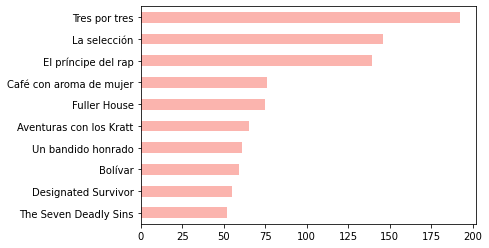

In [ ]:
df.loc[df.tipo=='serie'].nivel1.value_counts(ascending=True).tail(10).plot.barh(cmap='Pastel1')

Echo en falta mi serie favorita! Fuller House. Vamos a hacer una consulta de los títulos que incluyan ese nombre para ver por qué.

In [ ]:
df[df.Title.str.contains('Fuller House')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2020-09-10,"Fuller House: Temporada 1: Nuestros comienzos,...",serie,Fuller House,Temporada 1,"Nuestros comienzos, de nuevo",None,None,2020,September,10,Thursday
2020-08-23,Fuller House: Temporada 5: Otro episodio final,serie,Fuller House,Temporada 5,Otro episodio final,None,None,2020,August,23,Sunday
2020-08-23,Fuller House: Temporada 5: Algo prestado,serie,Fuller House,Temporada 5,Algo prestado,None,None,2020,August,23,Sunday
2020-08-23,Fuller House: Temporada 5: El juego de los cas...,serie,Fuller House,Temporada 5,El juego de los casi casados,None,None,2020,August,23,Sunday
2020-08-23,Fuller House: Temporada 5: Sé tú misma y ¡libé...,serie,Fuller House,Temporada 5,Sé tú misma y ¡libérate!,None,None,2020,August,23,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17,Fuller House: Temporada 1: Max el travieso,serie,Fuller House,Temporada 1,Max el travieso,None,None,2020,June,17,Wednesday
2020-06-17,Fuller House: Temporada 1: El no tan gran escape,serie,Fuller House,Temporada 1,El no tan gran escape,None,None,2020,June,17,Wednesday
2020-06-17,Fuller House: Temporada 1: A la antigua,serie,Fuller House,Temporada 1,A la antigua,None,None,2020,June,17,Wednesday


¿Qué día de la semana suelo ver más series?

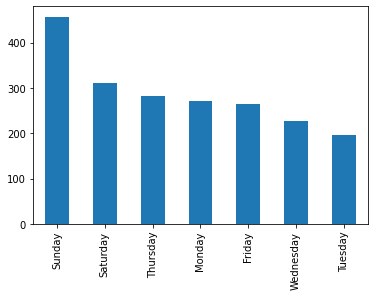

In [ ]:
df.loc[df.tipo=='serie','dia_semana'].value_counts().plot(kind='bar')

¿Existen diferencias en cuando veo Netflix entre series y películas?

In [ ]:
import seaborn as sns

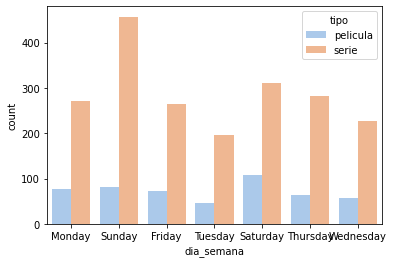

In [ ]:
sns.countplot(data=df,x='dia_semana',hue='tipo',palette='pastel');

¿El consumo a lo largo del año es constante o hay meses que consumo más?

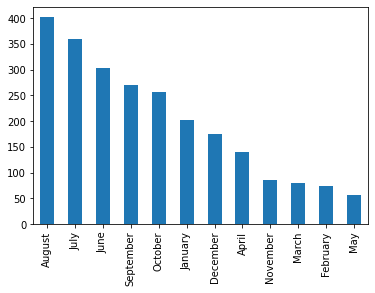

In [ ]:
df.loc[df.año<2022].mes.value_counts().plot.bar()

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

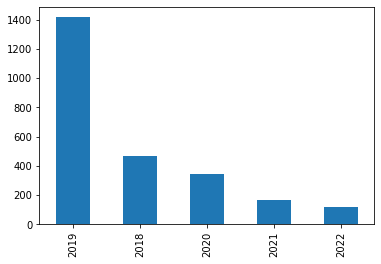

In [ ]:
df.año.value_counts().plot.bar()